# ***CNN model ***

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
train_dir = '/content/drive/MyDrive/train'
test_dir = '/content/drive/MyDrive/test'

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/non_xray')))
print(len(os.listdir('/content/drive/MyDrive/train/xray')))
print(len(os.listdir('/content/drive/MyDrive/test/non_xray')))
print(len(os.listdir('/content/drive/MyDrive/test/xray')))

621
565
551
565


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)


validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 949 images belonging to 2 classes.
Found 236 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:


model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
30/30 [==============================] - 799s 27s/step - loss: 0.4440 - accuracy: 0.7808 - val_loss: 0.1193 - val_accuracy: 0.9576
Epoch 2/30
30/30 [==============================] - 145s 5s/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.2042 - val_accuracy: 0.9407
Epoch 3/30
30/30 [==============================] - 148s 5s/step - loss: 0.0208 - accuracy: 0.9916 - val_loss: 0.0972 - val_accuracy: 0.9746
Epoch 4/30
30/30 [==============================] - 146s 5s/step - loss: 0.0216 - accuracy: 0.9905 - val_loss: 0.0930 - val_accuracy: 0.9746
Epoch 5/30
30/30 [==============================] - 145s 5s/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 0.0633 - val_accuracy: 0.9831
Epoch 6/30
30/30 [==============================] - 147s 5s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 0.9915
Epoch 7/30
30/30 [==============================] - 144s 5s/step - loss: 6.0022e-05 - accuracy: 1.0000 - val_loss: 0.0958 - val_accuracy: 0.9831
Epoch 8/

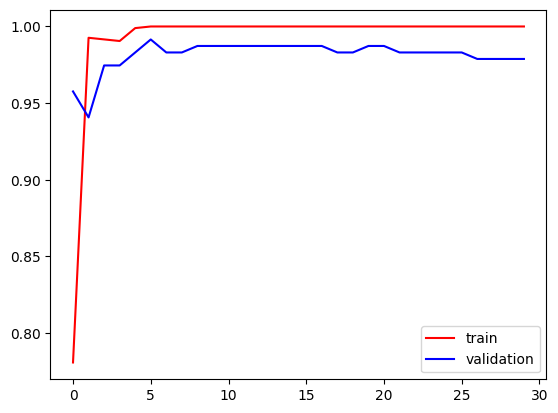

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

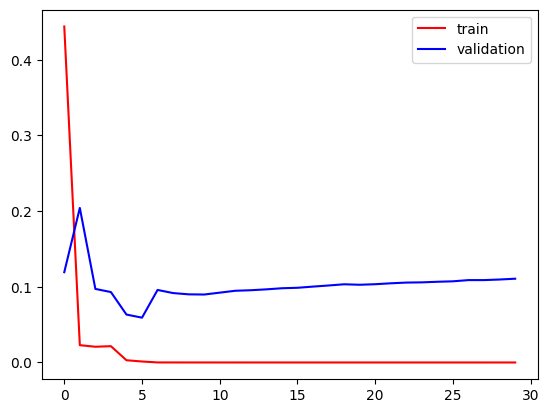

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1115 images belonging to 2 classes.


In [12]:

predictions = model.predict(test_data)
print(predictions)

35/35 [==============================] - 311s 9s/step
[[7.9926857e-20]
 [9.9999630e-01]
 [9.9998808e-01]
 ...
 [6.8532870e-30]
 [9.9999946e-01]
 [3.2499190e-09]]


In [13]:
len(predictions)

1115

In [14]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)


cm = confusion_matrix(true_labels, predicted_labels)


print("Confusion Matrix:")
print(cm)


print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[270 281]
 [276 288]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.49      0.49       551
           1       0.51      0.51      0.51       564

    accuracy                           0.50      1115
   macro avg       0.50      0.50      0.50      1115
weighted avg       0.50      0.50      0.50      1115



# *Pre-trained CNN model*





In [15]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 [==============================] - 4s 0us/step


In [16]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [17]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
30/30 [==============================] - 306s 10s/step - loss: 2.2022 - accuracy: 0.5448 - val_loss: 0.7481 - val_accuracy: 0.5508
Epoch 2/3
30/30 [==============================] - 301s 10s/step - loss: 0.5098 - accuracy: 0.7450 - val_loss: 0.5269 - val_accuracy: 0.7585
Epoch 3/3
30/30 [==============================] - 306s 10s/step - loss: 0.3396 - accuracy: 0.8862 - val_loss: 0.4643 - val_accuracy: 0.8093


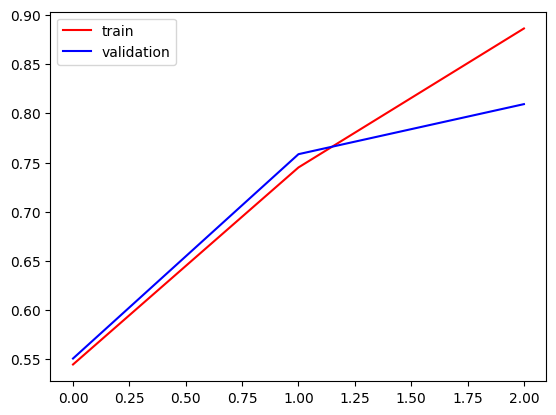

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

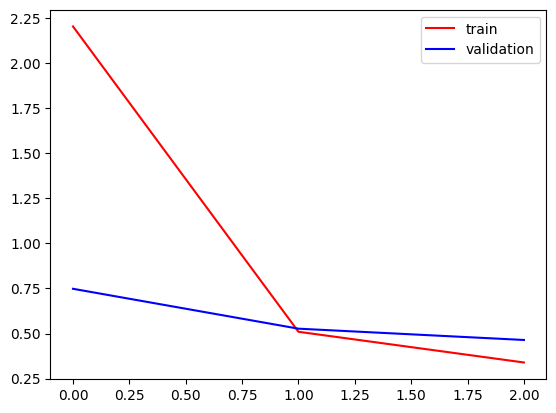

In [20]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1115 images belonging to 2 classes.


In [22]:
predictions = resnet_model.predict(test_data)
print(predictions)

35/35 [==============================] - 277s 8s/step
[[0.01997177]
 [0.19507393]
 [0.33584118]
 ...
 [0.9950412 ]
 [0.06941243]
 [0.0699048 ]]


In [23]:
len(predictions)

1115

In [24]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)


cm = confusion_matrix(true_labels, predicted_labels)


print("Confusion Matrix:")
print(cm)


print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[323 228]
 [314 250]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.59      0.54       551
           1       0.52      0.44      0.48       564

    accuracy                           0.51      1115
   macro avg       0.52      0.51      0.51      1115
weighted avg       0.52      0.51      0.51      1115

